In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
flight_data=pd.read_csv("/content/flight_data.csv")
flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00


In [ ]:
df_summary = flight_data.describe()
df_summary

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.00,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00
mean,2013.00,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23
std,0.00,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30
min,2013.00,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00
25%,2013.00,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00
50%,2013.00,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00
75%,2013.00,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00
max,2013.00,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00


In [ ]:
# 1. Date
flight_data['DATE'] = pd.to_datetime(flight_data[['year','month','day']], yearfirst=True)

# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
flight_data['MONTH_desc'] = flight_data['month'].apply(lambda m: month_dict[m])

flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00,2013-01-01,01- January


In [ ]:
rows,cols = flight_data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)e 

Number of rows:  336776
Number of columns:  21


In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            336776 non-null  int64         
 1   month           336776 non-null  int64         
 2   day             336776 non-null  int64         
 3   dep_time        328521 non-null  float64       
 4   sched_dep_time  336776 non-null  int64         
 5   dep_delay       328521 non-null  float64       
 6   arr_time        328063 non-null  float64       
 7   sched_arr_time  336776 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         336776 non-null  object        
 10  flight          336776 non-null  int64         
 11  tailnum         334264 non-null  object        
 12  origin          336776 non-null  object        
 13  dest            336776 non-null  object        
 14  air_time        327346 non-null  flo

In [ ]:
# Copy of Flight_data after dropping null values
flt_data_copy= flight_data.dropna()
flt_data_copy.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00,2013-01-01,01- January


# Airport & Airline flight Information

In [ ]:
# Number of scheduled departures planned by carriers in 2013

carrier_count = flight_data['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


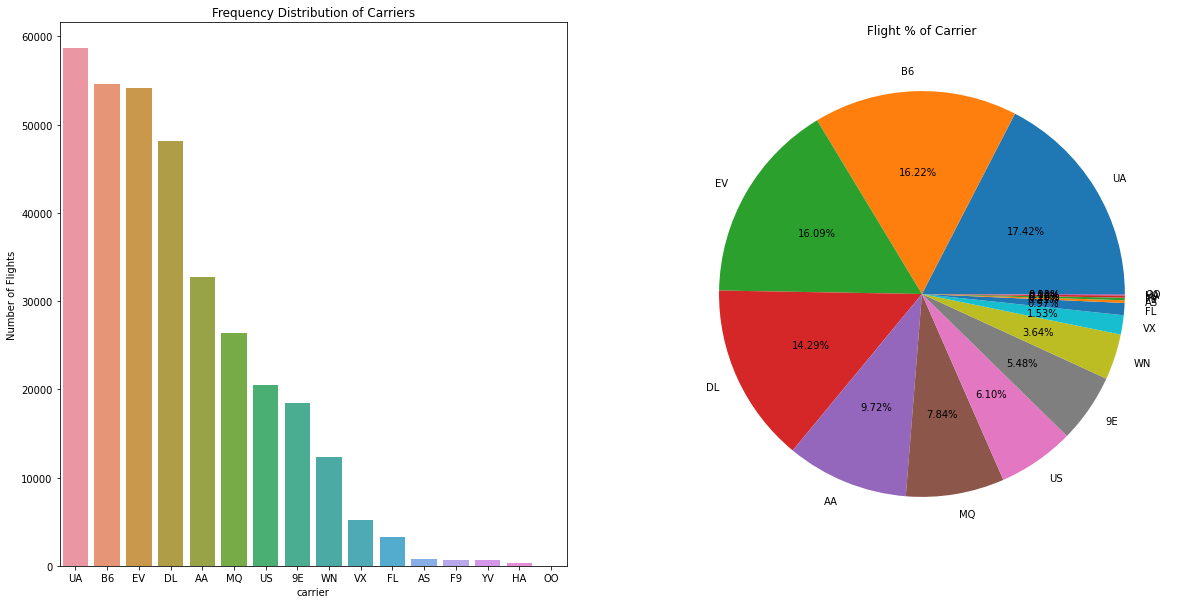

In [ ]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = flight_data['carrier'].value_counts().index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

In [ ]:
# Number of scheduled departure from different origin

allflight_NYC=flt_data_copy['dest'].unique()    
allflightcount_NYC=len(allflight_NYC)      # Total number of destination is 104
print("The total number of destination flight from NYC is"+ "::" ,allflightcount_NYC)
print('\n')

flt_data_copy['origin'].value_counts()

The total number of destination flight from NYC is:: 104




EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


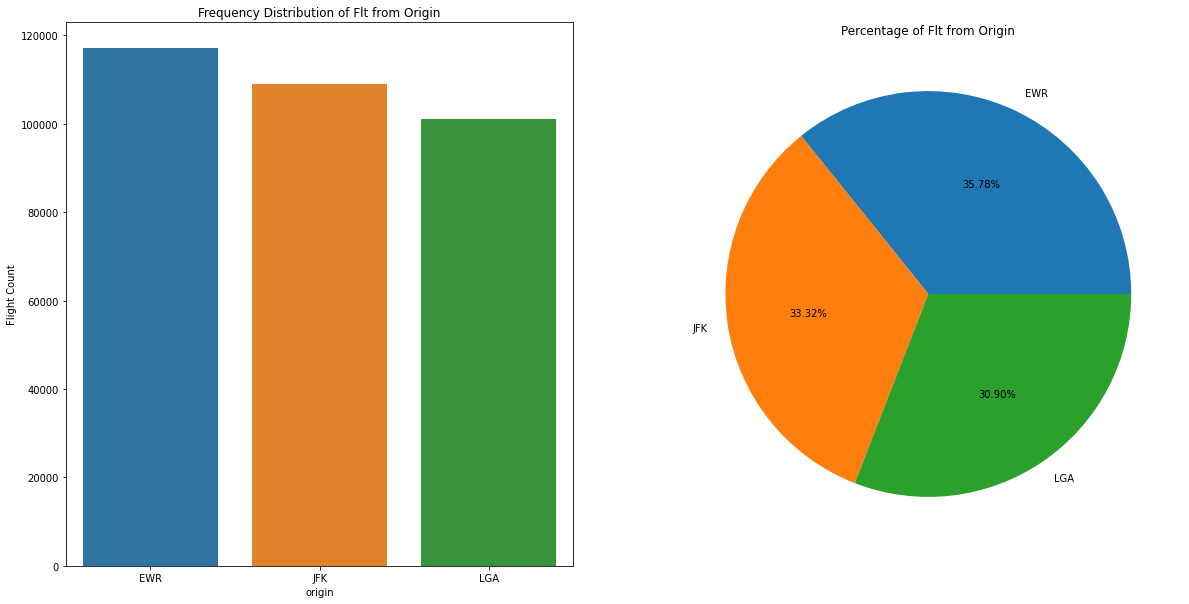

In [ ]:
origin_count = flt_data_copy['origin'].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_copy['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Percentage of Flt from Origin')
ax[1].set_ylabel('')
sns.countplot('origin',order = flt_data_copy['origin'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from Origin')
ax[0].set_ylabel('Flight Count')
plt.show()

In [ ]:
# Number of scheduled arrival at unique destination

Destination= flight_data['dest'].value_counts().sort_values(ascending=False).head(15)

Destination

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
DFW     8738
RDU     8163
TPA     7466
DEN     7266
Name: dest, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


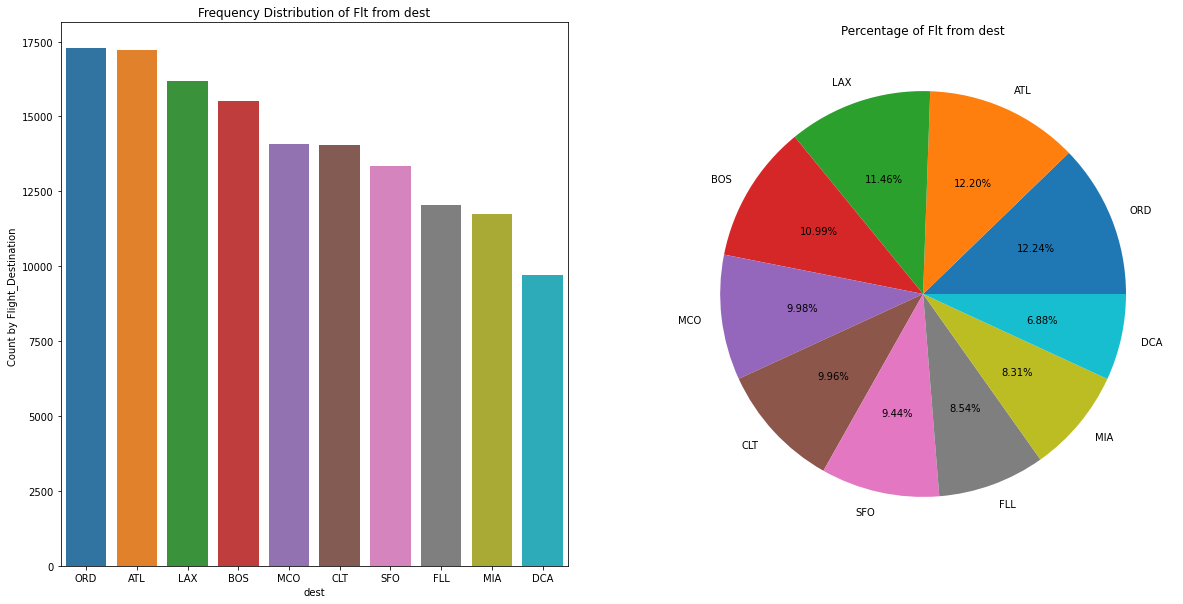

In [ ]:
#Top10 destination flight from NYC in bar graph

f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                
ax[1].set_title('Percentage of Flt from dest')
ax[1].set_ylabel('')
sns.countplot('dest',order = flight_data['dest'].sort_values(ascending=False).value_counts().head(10).index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from dest')
ax[0].set_ylabel('Count by Flight_Destination ')
plt.show()

The top_10 destination flight from NYC are


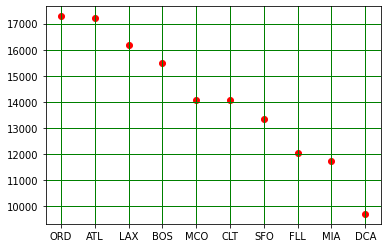

,dest,month
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [ ]:
#Top10 destination flight from NYC 

dest_count=flight_data.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='g', linewidth=1)
plt.show()
top_dest_flight

In [ ]:
#  Maximum number of flights headed to unique destination from Origin.

dest_flight = flight_data.groupby('origin')['dest'].value_counts()

dest_flight.head(10)


origin  dest
EWR     ORD     6100
        BOS     5327
        SFO     5127
        CLT     5026
        ATL     5022
        MCO     4941
        LAX     4912
        IAH     3973
        FLL     3793
        DTW     3178
Name: dest, dtype: int64

In [ ]:
#Total number of unique Airline headed to BOS from NYC

BOS_dest=flight_data[flight_data['dest']=='BOS']
Carrier_count=(BOS_dest['carrier']).unique()

print("Carrier fly to BOS", Carrier_count)
print('\n')

print("Total number of Carrier  headed to 'BOS' from NYC is",len(Carrier_count))
print('\n')

BOS_dest_count=BOS_dest['tailnum'].unique()
print("Total unique aircraft  headed to 'BOS' from NYC is",len(BOS_dest_count))
print('\n')

Carrier fly to BOS ['B6' 'AA' 'DL' 'UA' 'US' '9E' 'EV']


Total number of Carrier  headed to 'BOS' from NYC is 7


Total unique aircraft  headed to 'BOS' from NYC is 1308




# Problem Statement _ Delay Information

In [ ]:
# Avg. Monthly Departure Delay for Carrier

Monthly_Avg_Delay= flt_data_copy.groupby(['carrier','MONTH_desc'], axis=0, as_index=True).agg({'dep_delay':'mean'})
Monthly_Avg_Delay.head(15)

dep_delay
carrier MONTH_desc              
9E      01- January        16.58
        02- February       16.39
        03- March          13.28
        04- April          13.45
        05- May            22.64
        06- June           28.31
        07- July           30.44
        08- August         17.11
        09- September       7.60
        10- October         9.33
        11- November        7.44
        12- December       19.27
AA      01- January         6.97
        02- February        8.24
        03- March           8.70

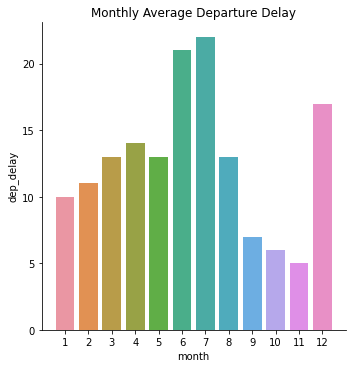

In [ ]:
# Monthly Average Departure Departure Delay

monthly_delay = flight_data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()


In [ ]:
#Avg_arr_delay_sort by Carrier in 2013 (inclusive early arrival)

flt_data_copy.groupby('carrier').agg(np.size)                 
top_delay = flt_data_copy.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(16)

arr_delay      
             size  mean
carrier                
F9            681 21.92
FL           3175 20.12
EV          51108 15.80
YV            544 15.56
OO             29 11.93
MQ          25037 10.77
WN          12044  9.65
B6          54049  9.46
9E          17294  7.38
UA          57782  3.56
US          19831  2.13
VX           5116  1.76
DL          47658  1.64
AA          31947  0.36
HA            342 -6.92
AS            709 -9.93

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


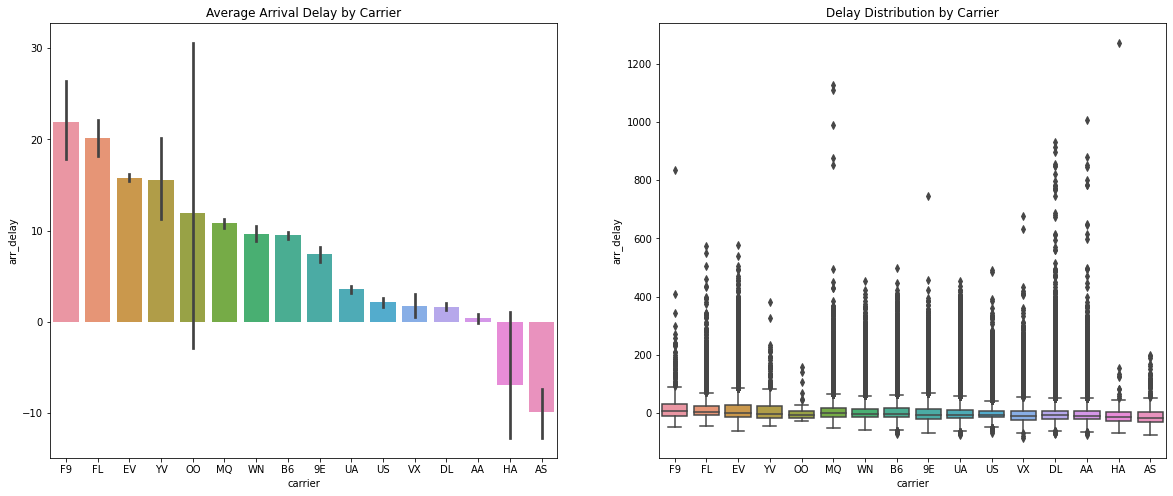

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


In [ ]:
#Average arrival delay by carrier in 2013   (inclusive early arrival)

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flt_data_copy,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flt_data_copy,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

In [ ]:
#Avg_arr_delay_ for destination in 2013
flt_data_copy.groupby('dest').agg(np.size)                 # size() is calculating the count
airport_delay = flt_data_copy.groupby('dest').agg({'arr_delay' :[np.size,np.mean]})
                                                                

airport_delay.sort_values([('arr_delay','mean')], ascending=False).head(10)

arr_delay      
          size  mean
dest                
CAE        106 41.76
TUL        294 33.66
OKC        315 30.62
JAC         21 28.10
TYS        578 24.07
MSN        556 20.20
RIC       2346 20.11
CAK        842 19.70
DSM        523 19.01
GRR        728 18.19

In [ ]:
#Top_10_arr_delay_for Destination with sample size>1000

top_arr_delay = airport_delay['arr_delay']['size'] >= 1000       # only variable with sample size >= 1000 will be considered 

airport_delay[top_arr_delay].sort_values([('arr_delay', 'mean')], ascending=False)[:10]

arr_delay      
          size  mean
dest                
RIC       2346 20.11
CVG       3725 15.36
MCI       1885 14.51
MKE       2709 14.17
GSO       1492 14.11
IAD       5383 13.86
DAY       1399 12.68
SDF       1104 12.67
MDW       4025 12.36
JAX       2623 11.84

# Problem Statement _ Ontime Departure & Arrival Analysis

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`

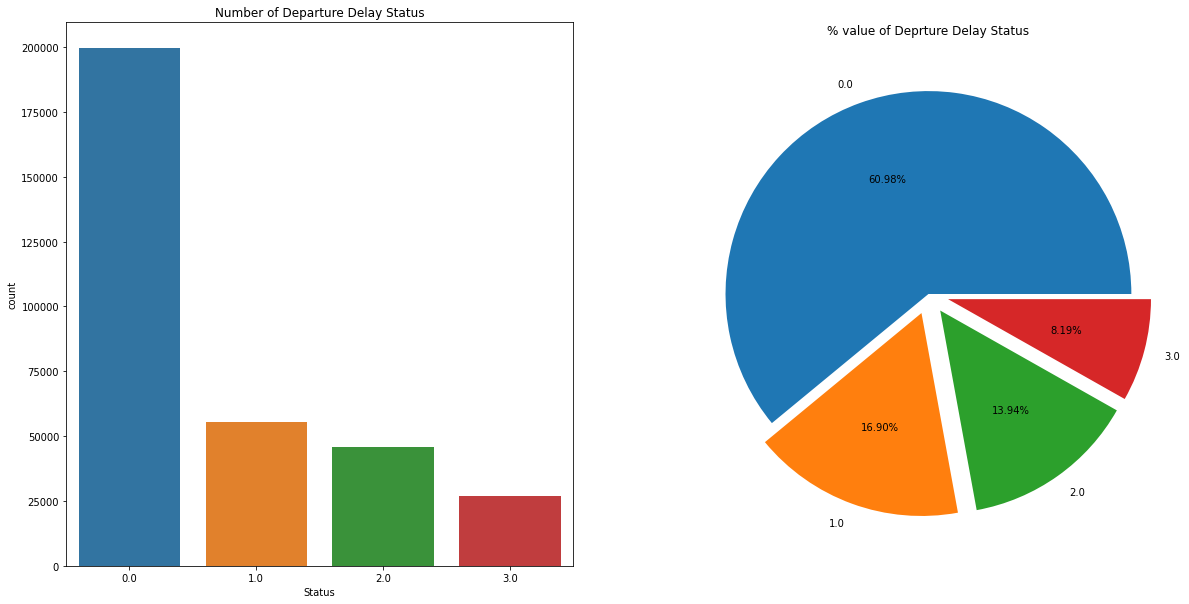

In [ ]:
# Departure_Delay status classifications

flt_data_copy.loc[flt_data_copy['dep_delay'] <= 0, 'Status'] = 0
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 1, 'Status'] = 1
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 15, 'Status'] = 2
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 60, 'Status'] = 3

# Departure_Delay_status_graph

f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_copy['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)
                                                       
ax[1].set_title('% value of Deprture Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_copy['Status'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Number of Departure Delay Status')
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


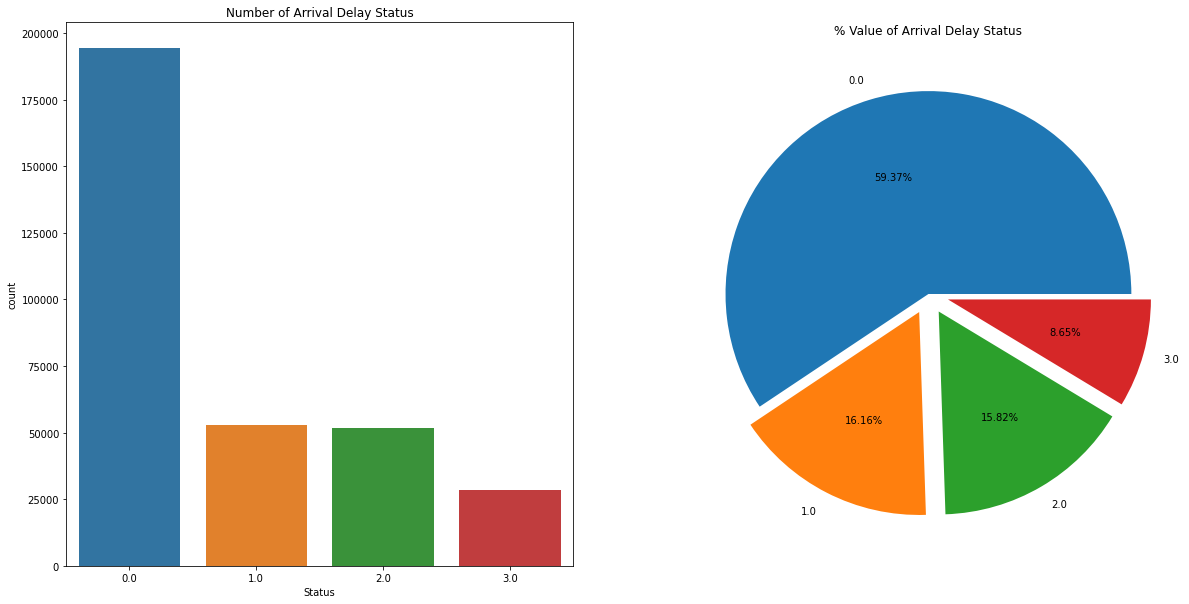

In [ ]:
# Arrival_Delay status classification

flt_data_copy.loc[flt_data_copy['arr_delay'] <= 0, 'Status'] = 0
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 1, 'Status'] = 1
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 15, 'Status'] = 2
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 60, 'Status'] = 3

## Arrival_delay_status_graph

f,ax=plt.subplots(1,2,figsize=(20,10))

flt_data_copy['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% Value of Arrival Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_copy['Status'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Number of Arrival Delay Status')
plt.show()


In [ ]:
Delayedflights = flt_data_copy[(flt_data_copy.Status >= 1) &(flt_data_copy.Status <= 3)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


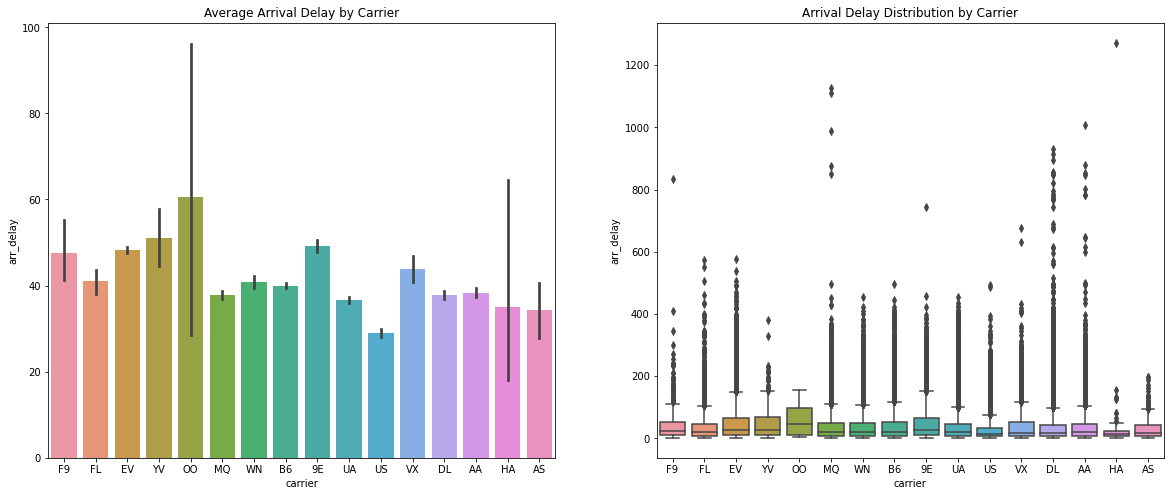

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the second lowest of all the carriers.


Carriers with higher average delay generation are Skywest Airlines(OO) with 60 minutes per flight,  Mesa Airlines (YV) with 50 minutes per flight, and Pinnacle Airlines (9E) with 49 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean  (

In [ ]:
#Average arrival delay by carrier
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=Delayedflights,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=Delayedflights,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Arrival Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

print('\n')
print('The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the second lowest of all the carriers.')
print('\n')
print('Carriers with higher average delay generation are Skywest Airlines(OO) with 60 minutes per flight,  Mesa Airlines (YV) with 50 minutes per flight, and Pinnacle Airlines (9E) with 49 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean  (OO, HA, YV, F9, AS); so it seems like size matters.')
print('\n')
print('The boxplot shows, airlines with higher number of flights results having a higher chance of extreme waiting situation. American Eagle Airlines (MQ), American Airlines(AA), Delta Airline(DL) registered the maximum Carrier Delay for 2013 with an exception of Hawaiian Airlines (HA).')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


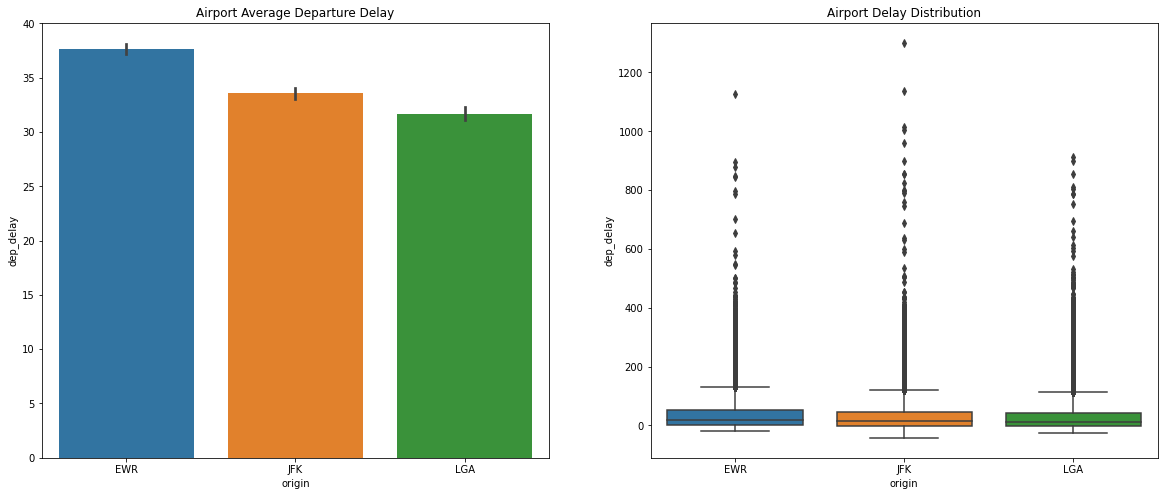

There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from barplot for average departure delay per flight. Considering, the assumption that JFK being a busiest airport among 3 due to international flights; so the maximum departure delay for 2013 is registered by JFK.


In [ ]:
#Average departure delay by carrier

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('origin','dep_delay', data=Delayedflights,ax=ax[0], order=['EWR', 'JFK', 'LGA'])
                                                                                 
ax[0].set_title('Airport Average Departure Delay')
sns.boxplot('origin','dep_delay', data=Delayedflights,ax=ax[1], order=['EWR', 'JFK', 'LGA'])
ax[1].set_title('Airport Delay Distribution')
plt.close(2)
plt.show()


print('There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from barplot for average departure delay per flight. Considering, the assumption that JFK being a busiest airport among 3 due to international flights; so the maximum departure delay for 2013 is registered by JFK.')

# Problem Statement _ Performance Analysis


In [ ]:
scheduled_departure = flight_data.count()['sched_dep_time'] 
actual_departure = flight_data.count()['dep_time']  
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper
                                            
print("Sched_dep: ", scheduled_departure)
print("Operated: ", actual_departure)
print("Cancelled: ", cancel_departure)
print("\n")
print("Ratio operated flights over scheduled flights: %s" % ratio_oper)
print("Ratio of cancelled flights: %s" % ratio_cancel)

Sched_dep:  336776
Operated:  328521
Cancelled:  8255


Ratio operated flights over scheduled flights: 97.54881583010666
Ratio of cancelled flights: 2.451184169893338


In [ ]:
# The day and month having highest average delay departure by 

Delay_Day=flt_data_copy.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
Delay_Day_max=Delay_Day['dep_delay'].max()
Delay_Day_info=Delay_Day[Delay_Day['dep_delay']==Delay_Day_max]
print("The day and month having highest delay by average for departures" '\n' ,Delay_Day_info)

The day and month having highest delay by average for departures
     day  month  dep_delay
86    8      3      83.65


In [ ]:
# The day and month having highest number of flight delay

max_flightdelay_day=flt_data_copy[flt_data_copy['dep_delay'] > 0].groupby(['day','month'], as_index=False).agg({'flight': 'count'})
max_flightdelay_info = max_flightdelay_day[max_flightdelay_day['flight'].max() == max_flightdelay_day['flight']]
print("Day and month which have highest number of flight delay" '\n' ,max_flightdelay_info)

Day and month which have highest number of flight delay
      day  month  flight
275   23     12     673


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


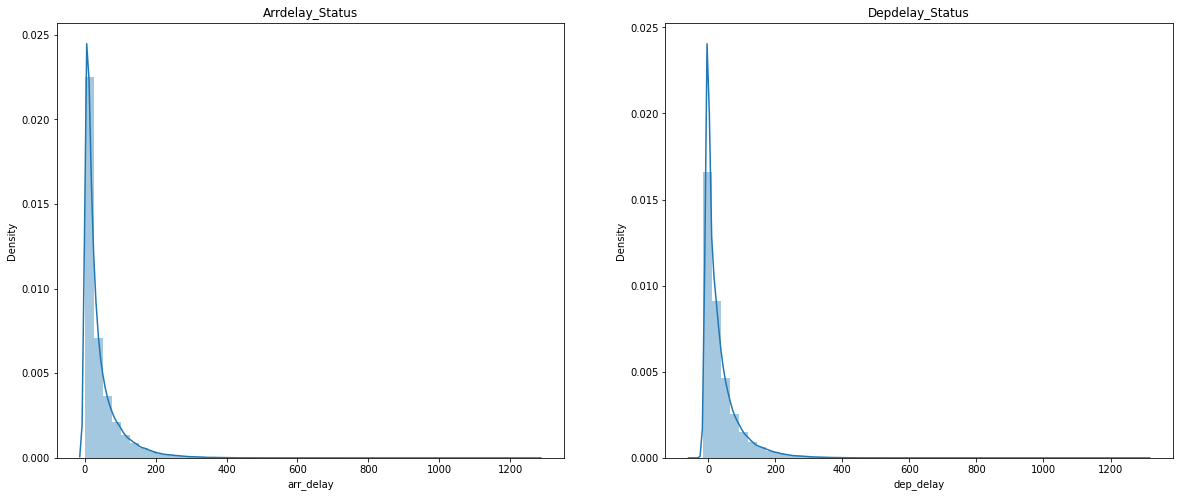

Skewness_arr: 3.433909
Kurtosis_arr: 24.606943
Skewness_dep: 3.250293
Kurtosis_dep: 22.521400


It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.


The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.


In [ ]:
# histogram for arrival and departure delay

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(Delayedflights['arr_delay'], ax=ax[0])

ax[0].set_title('Arrdelay_Status')

sns.distplot(Delayedflights['dep_delay'], ax=ax[1])
ax[1].set_title('Depdelay_Status')
plt.show()

print("Skewness_arr: %f" % Delayedflights['arr_delay'].skew())
print("Kurtosis_arr: %f" % Delayedflights['arr_delay'].kurt())
print("Skewness_dep: %f" % Delayedflights['dep_delay'].skew())
print("Kurtosis_dep: %f" % Delayedflights['dep_delay'].kurt())
print('\n')
print('It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.') 
print('\n')
print('The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.')

Top 5 destinations where flights arrives early than expected arrival time 



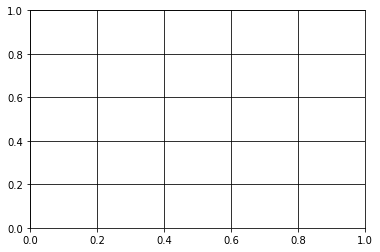

In [ ]:
# Top5 destination where flight arrives early than expected arrival time

Ontime_Early_flights =flt_data_copy[(flt_data_copy.Status <= 0)]

top10flight=(Ontime_Early_flights.sort_values(['arr_delay'], ascending=True)).head(10)
top10flight_details=pd.DataFrame(top10flight, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','flight_speed'])
print("Top 5 destinations where flights arrives early than expected arrival time",'\n')


#sns.lmplot(x = 'dest', y='arr_delay', data = top10flight_details, fit_reg=False, hue="flight")

plt.grid(True, color='k')

plt.show()


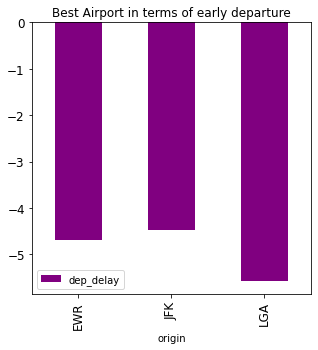

In [ ]:
# Best airport in terms of early departure from NYC

airport_info = pd.DataFrame(flt_data_copy,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_origin = airport_info[airport_info['dep_delay']<0]
best_airport = airport_origin.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar',color='purple', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

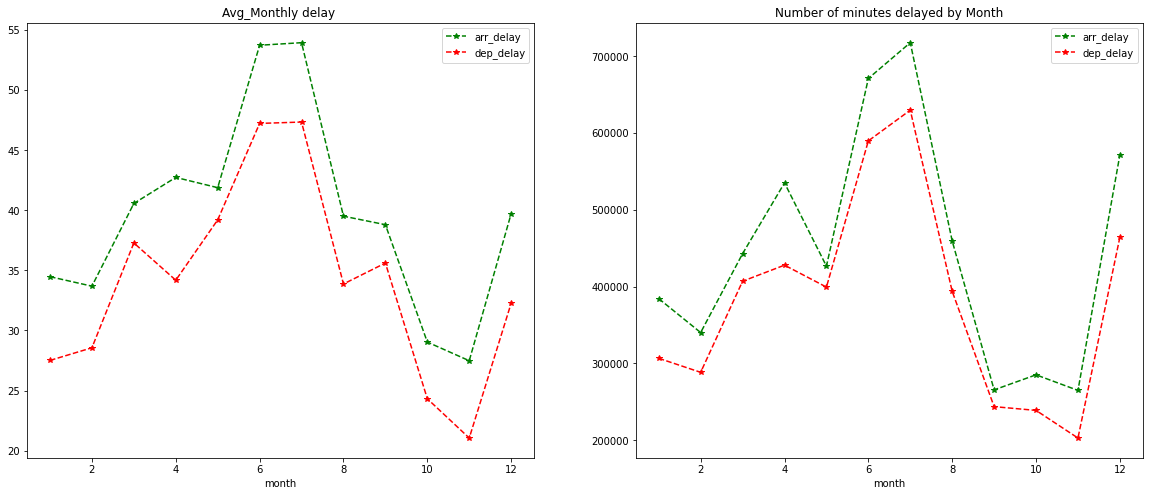

In [ ]:
# Line Graph for Avg_Monthly delay of a/c  and Number of minutes delayed by month (excluding staus 0)
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly delay ')
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Number of minutes delayed by Month')
plt.show()

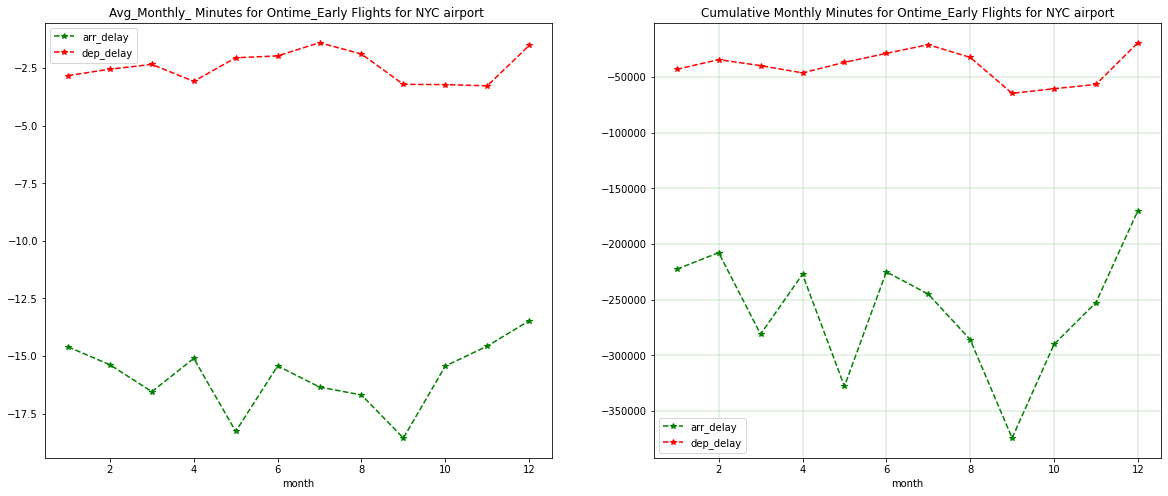

In [ ]:
# Monthly_Delays of Ontime_Early_ Flights (only for status 0)

f,ax=plt.subplots(1,2,figsize=(20,8))
Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly_ Minutes for Ontime_Early Flights for NYC airport ')


Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Cumulative Monthly Minutes for Ontime_Early Flights for NYC airport')
plt.grid(True, color='g',linewidth='0.2')
plt.show()

# Problem Statement_ Aircraft Speed Analysis


In [ ]:
# Flight Speed Analysis 

flight_speed =flt_data_copy['distance'] / (flt_data_copy['air_time']/60)
flt_data_copy['flight_speed'] =flight_speed
flt_data_copy.sort_values(by='flight_speed', ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc,Status,flight_speed
216447,2013,5,25,1709.00,1700,9.00,1923.00,1937,-14.00,DL,...,ATL,65.00,762,17,0,25-05-2013 17:00,2013-05-25,05- May,0.00,703.38
251999,2013,7,2,1558.00,1513,45.00,1745.00,1719,26.00,EV,...,MSP,93.00,1008,15,13,2/7/2013 15:00,2013-07-02,07- July,2.00,650.32
205388,2013,5,13,2040.00,2025,15.00,2225.00,2226,-1.00,EV,...,GSP,55.00,594,20,25,13-05-2013 20:00,2013-05-13,05- May,0.00,648.00
157516,2013,3,23,1914.00,1910,4.00,2045.00,2043,2.00,EV,...,BNA,70.00,748,19,10,23-03-2013 19:00,2013-03-23,03- March,1.00,641.14
10223,2013,1,12,1559.00,1600,-1.00,1849.00,1917,-28.00,DL,...,PBI,105.00,1035,16,0,12/1/2013 16:00,2013-01-12,01- January,0.00,591.43


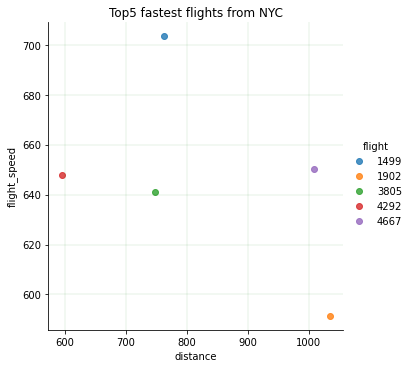

,flight,tailnum,distance,air_time,flight_speed
216447,1499,N666DN,762,65.00,703.38
251999,4667,N17196,1008,93.00,650.32
205388,4292,N14568,594,55.00,648.00
157516,3805,N12567,748,70.00,641.14
10223,1902,N956DL,1035,105.00,591.43


In [ ]:
# Top5 fastest flights details from NYC

speed_5=flt_data_copy.loc[:, ['flight', 'tailnum','distance','air_time','flight_speed']].sort_values(by='flight_speed',ascending=False,axis=0).head(5)
sns.lmplot(x = 'distance', y='flight_speed', data = speed_5, fit_reg=False, hue="flight")
plt.grid(True, color='g', linewidth=0.1)
plt.title("Top5 fastest flights from NYC")
plt.show()
speed_5

In [ ]:
Carrier_hmap=flt_data_copy.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute','DATE',
                              'time_hour','month','year','origin','dest','tailnum','Status',
                                 'distance','flight','air_time'], axis=1)
Carrier_hmap.head()

,day,dep_delay,arr_delay,carrier,MONTH_desc,flight_speed
0,1,2.00,11.00,UA,01- January,370.04
1,1,4.00,20.00,UA,01- January,374.27
2,1,2.00,33.00,AA,01- January,408.38
3,1,-1.00,-18.00,B6,01- January,516.72
4,1,-6.00,-25.00,DL,01- January,394.14


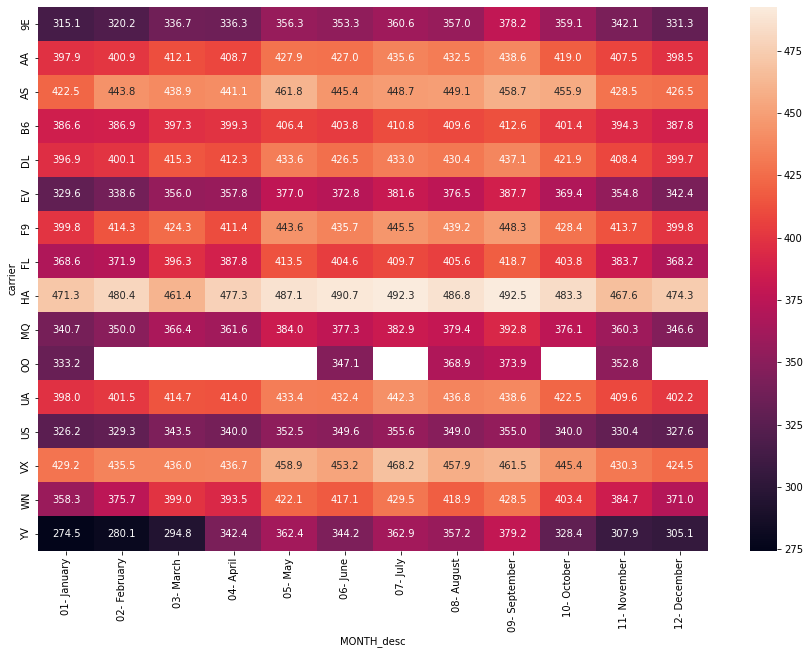

The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.


In [ ]:
Carrier_hmap_OO = pd.pivot_table(Carrier_hmap,values='flight_speed', aggfunc='mean', index='carrier',columns='MONTH_desc')
Carrier_hmap_OO.head()

plt.figure(figsize=(15,10))
sns.heatmap(Carrier_hmap_OO,annot=True, fmt=".1f")
plt.show()
print('The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.')

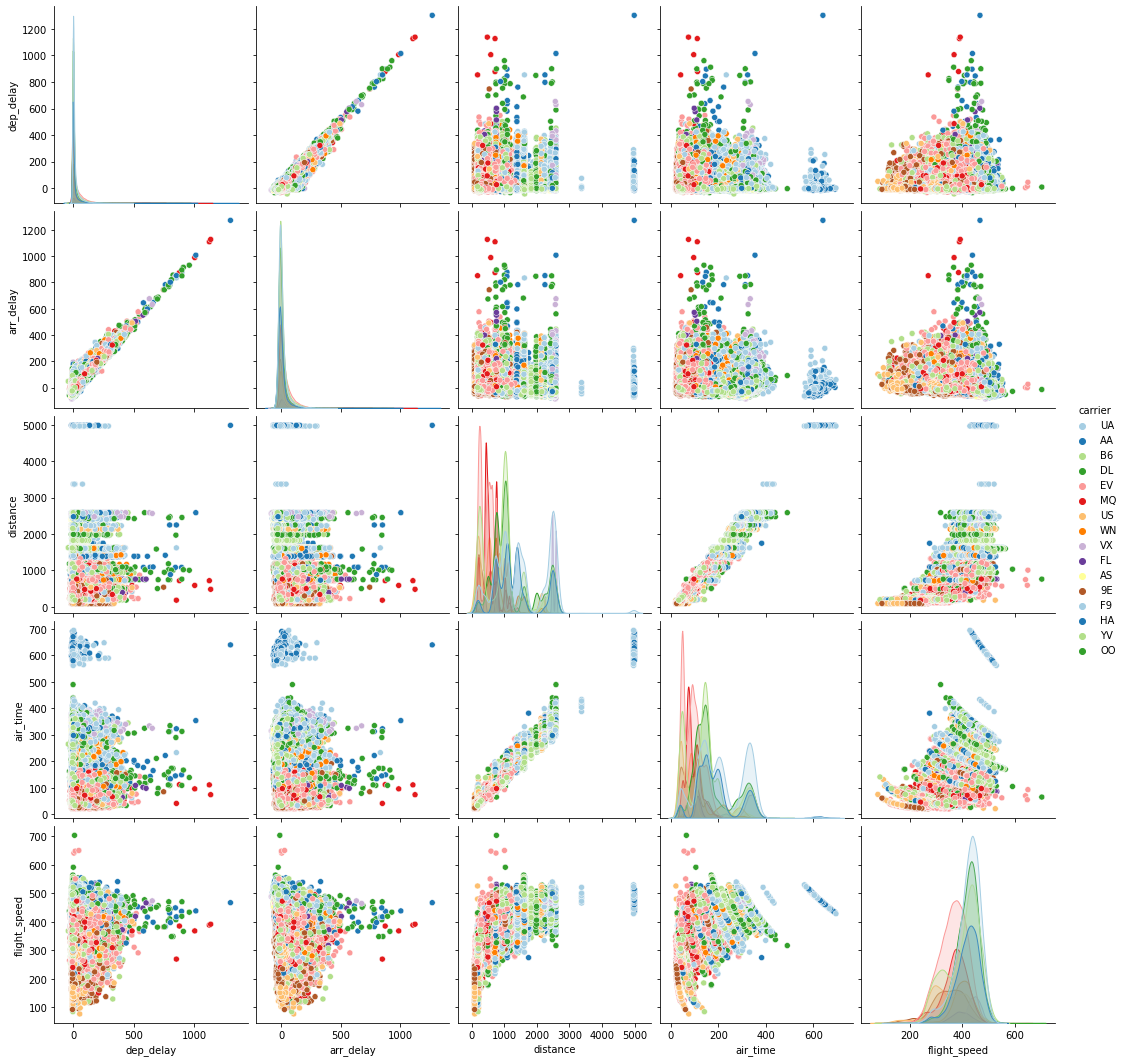

In [ ]:
Airlines_info= sns.pairplot(flt_data_copy, height=3,
                            vars=['dep_delay','arr_delay','distance','air_time','flight_speed'], hue='carrier', palette="Paired")
plt.show(Airlines_info)

In [ ]:
flt_corr= flt_data_copy.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute',
                              'time_hour','DATE','MONTH_desc','year','flight'], axis=1)


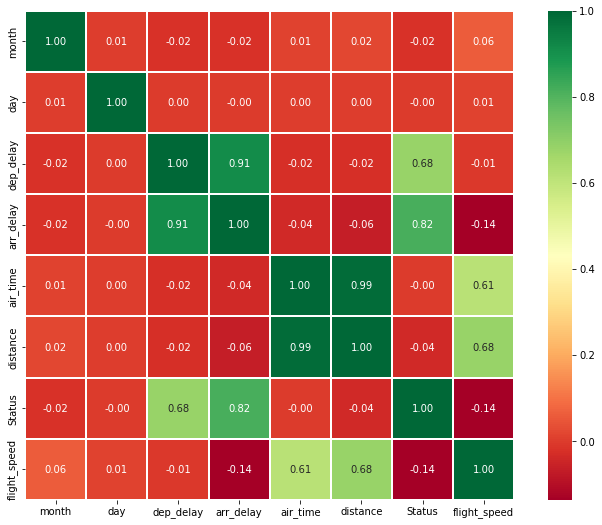

The coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.


In [ ]:
corrmat = flt_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()



print('The coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.')